<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/ch02_05_%ED%9E%88%ED%8A%B8%EB%A7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.05. 히트맵

---
* 날짜:
* 이름:

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='rainbow')
plt.show()
```

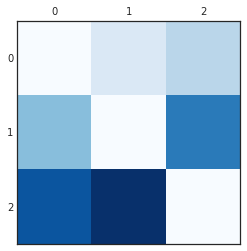

In [3]:
x = [[1,2,3],
     [4,1,6],
     [7,8,1]]
plt.matshow(x, cmap='Blues')
plt.show()

#### | 컬러바

```
plt.colorbar(ax, 
             cmap=None, # 컬러맵
             alpha=None, # 투명도
             orientation='vertical', # 위치 {'vertical', 'horizontal'}
             extend=None,  # 초과값 {'neither', 'both', 'min', 'max'}
             shrink = None # 길이 축소
             aspect = None # 세로, 가로 비
             label=''# 라벨)
```

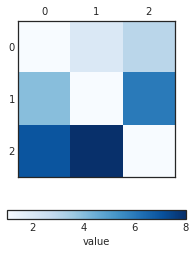

In [10]:
plt.matshow(x, cmap='Blues')
plt.colorbar(orientation = 'horizontal',shrink = 0.8, label = 'value')
plt.show()

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.heatmap(x)
```

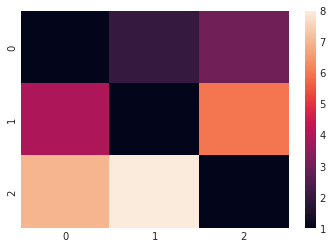

In [12]:
sns.heatmap(x)
plt.show()

#### | 옵션

```
seaborn.heatmap(data,
                cmap=None, # 컬러맵
                annot=None, # 값 표기
                fmt='.2g', # 데이터 타입
                linewidths=0, # 선 굵기
                linecolor='white', # 선 색
                cbar=True, # 컬러맵 표기
                square=False, # 사이즈 정사각
                xticklabels='auto', # x 눈금 라벨 
                yticklabels='auto', # y 눈금 라벨
                vmin = # 최소값
                vmax = # 최대값
                ax=None, **kwargs)
```

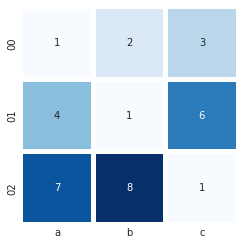

In [25]:
sns.heatmap(x, annot = True,
            cmap = 'Blues',
            fmt = 'd',
            # linecolor = 'blue', # 선 색깔 
            linewidth = 4, #선 굵기
            cbar = False,
            square = True,
            xticklabels = ['a','b','c'],
            yticklabels = ['00','01','02']) #컬러바 유무
plt.show()

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.


In [26]:
df = pd.DataFrame(x)

df

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1



* 데이터프레임에서 기본적으로 플롯을 제공합니다.

```
df.style.background_gradient()
```


In [28]:
df.style.background_gradient()

,0,1,2
0,1,2,3
1,4,1,6
2,7,8,1


* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.heatmap(data=df)
```


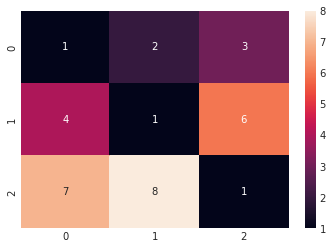

In [30]:
sns.heatmap(data = df, annot = True)


##  **실습** 
---



### (1) pivot 테이블 이용한 시계열 데이터 시각화


```
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

```

In [40]:
np.random.seed(42)
t = ['오전','오후','저녁']*5
day=[f'2020/01/0{i+1}' for i in range(5) for j in range(3)]
vals = np.random.randint(100,500, len(t))

df = pd.DataFrame([day, t]).T
df.columns = ['day', 'time']
df['count'] = vals
df.head()

,day,time,count
0,2020/01/01,오전,202
1,2020/01/01,오후,448
2,2020/01/01,저녁,370
3,2020/01/02,오전,206
4,2020/01/02,오후,171


In [42]:
# 행 / 열/ 값
df.pivot('day','time', 'count').style.background_gradient()

time,오전,오후,저녁
day,,,
2020/01/01,202,448,370
2020/01/02,206,171,288
2020/01/03,120,202,221
2020/01/04,314,430,187
2020/01/05,472,199,459


### (2) Iris 데이터 변수별 상관관계 분석


```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [95]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
y_names = iris.target_names
x_data = iris.data
y_data = iris.target

df = pd.DataFrame(x_data)
df.columns = x_names
df['label']= y_data
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
df.corr().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


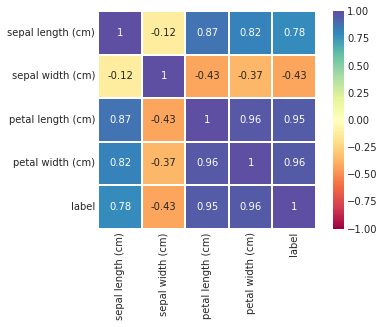

In [138]:
cor = df.corr()
sns.heatmap(cor, cmap = "Spectral", annot = True,
            vmin= -1, vmax = 1, linewidth = 1, square = True)

### (3) Iris 데이터 종류별 크기 분석



In [102]:
# 라벨이 0 / 1 / 2 각각의 평균
df.groupby('label').mean().style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.936000,2.770000,4.260000,1.326000
2,6.588000,2.974000,5.552000,2.026000


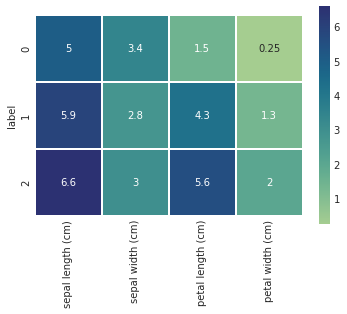

In [139]:
dfg = df.groupby('label').mean()

sns.heatmap(dfg, cmap = 'crest', annot = True,
            linewidth = 1, square = True)


##  **과제** 
---



### (1) 히트맵을 이용한 flight 데이터 시각화


```
df=sns.load_dataset('flights')
```

* `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러오세요.
* `year`를 세로축, `month`를 가로축으로 하는 피벗 테이블을 그리고 히트맵으로 시각화 하세요.



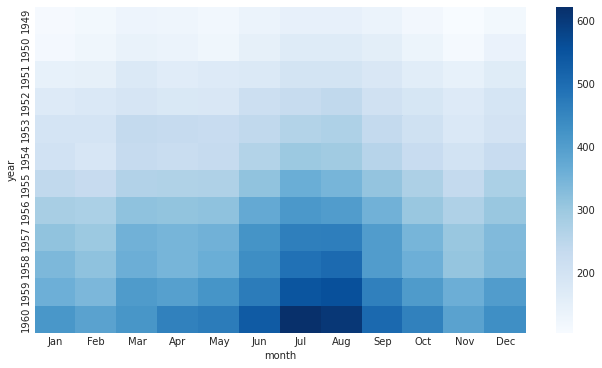

In [140]:
dff=sns.load_dataset('flights')
dff_p = dff.pivot('year', 'month','passengers')
plt.figure(figsize = (11,6))
sns.heatmap(dff_p, cmap = 'Blues')


### (2) 캘리포니아 집값 데이터 변수별 상관관계 분석

* /content/sample_data/california_housing_test.csv을 불러오세요.
* 변수별 상관관계를 나타내는 히트맵을 `seaborn`을 이용해  그리세요.
* 상관관계 높은 변수를 찾고, 정리해보세요.

In [115]:
dfc = pd.read_csv('/content/sample_data/california_housing_test.csv')

dfc_cor = dfc.corr()
dfc_cor.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279


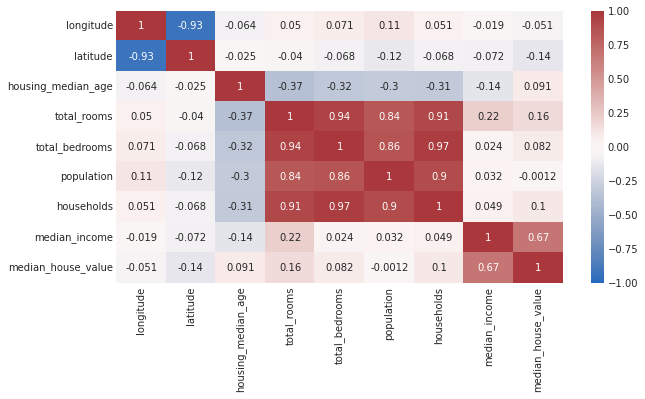

In [129]:
plt.figure(figsize = (10,5))
sns.heatmap(dfc_cor, cmap  = 'vlag', vmin = -1, vmax = 1, annot = True)


